# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2021.04.22.1.CT

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'cyuntao'

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes</span>

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
us = pd.read_csv('Youtube/USvideos.csv')
us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


<AxesSubplot:title={'center':'Histogram of comments'}, ylabel='Frequency'>

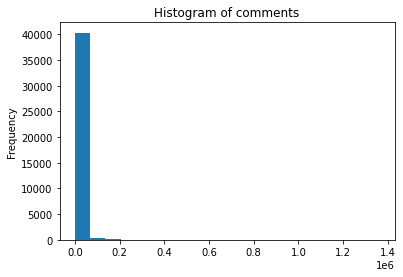

In [4]:
us.comment_count.plot(kind='hist', bins=20, title='Histogram of comments')

In [5]:
len(us[us.comment_count > 25000].comment_count) / len(us.comment_count)

0.06556936677330338

<AxesSubplot:title={'center':'Histogram of comments (range specified)'}, ylabel='Frequency'>

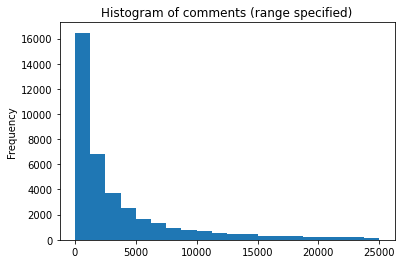

In [6]:
us.comment_count.plot(kind='hist', range=[0, 25000], bins=20, title='Histogram of comments (range specified)')

<AxesSubplot:title={'center':'Histogram of views'}, ylabel='Frequency'>

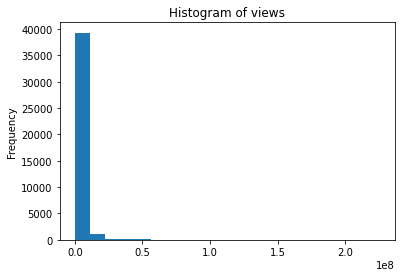

In [7]:
us.views.plot(kind='hist', bins=20, title='Histogram of views')

In [8]:
len(us[us.views > 7e6].views) / len(us.views)

0.0656670492563921

<AxesSubplot:title={'center':'Histogram of views (range specified)'}, ylabel='Frequency'>

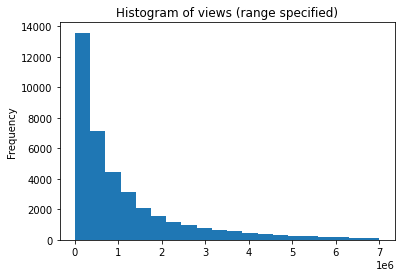

In [9]:
us.views.plot(kind='hist', range=[0, 7e6], bins=20, title='Histogram of views (range specified)')

<AxesSubplot:title={'center':'Histogram of likes'}, ylabel='Frequency'>

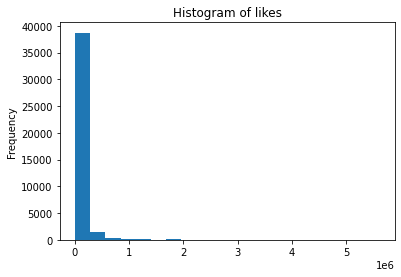

In [10]:
us.likes.plot(kind='hist',bins=20, title='Histogram of likes')

In [11]:
len(us[us.likes > 3e5].likes) / len(us.likes)

0.05145424796698332

<AxesSubplot:title={'center':'Histogram of likes (range specified)'}, ylabel='Frequency'>

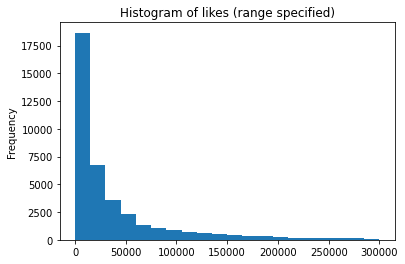

In [12]:
us.likes.plot(kind='hist',range=[0, 3e5], bins=20, title='Histogram of likes (range specified)')

<AxesSubplot:title={'center':'Histogram of dislikes'}, ylabel='Frequency'>

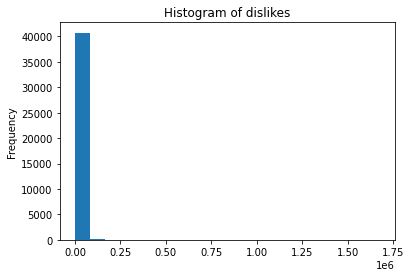

In [13]:
us.dislikes.plot(kind='hist',bins=20, title='Histogram of dislikes')

In [14]:
len(us[us.dislikes > 10000].dislikes) / len(us.dislikes)

0.061100393171994435

<AxesSubplot:title={'center':'Histogram of dislikes (range specified)'}, ylabel='Frequency'>

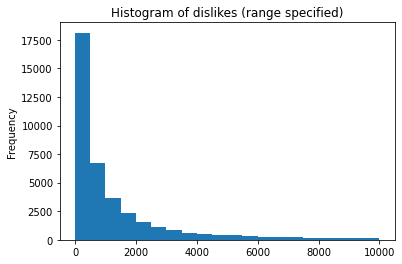

In [15]:
us.dislikes.plot(kind='hist',range=[0, 10000], bins=20, title='Histogram of dislikes (range specified)')

In [16]:
us_log = us.copy()

In [17]:
us_log.loc[us_log['comment_count'] == 0, 'comment_count'] = np.nan

In [18]:
us_log['log_comments'] = np.log(us_log['comment_count'])

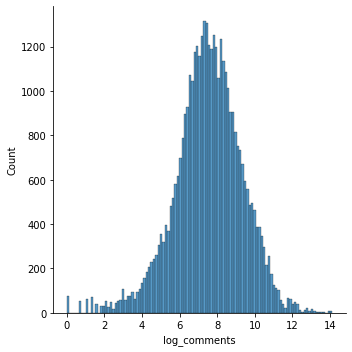

In [19]:
sns.displot(us_log['log_comments'] )

In [20]:
us_log['log_views'] = np.log(us_log['views'])

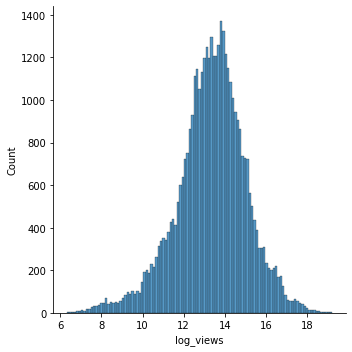

In [21]:
sns.displot(us_log['log_views'] )

In [22]:
us_log.loc[us_log['likes'] == 0, 'likes'] = np.nan

In [23]:
us_log['log_likes'] = np.log(us_log['likes'])

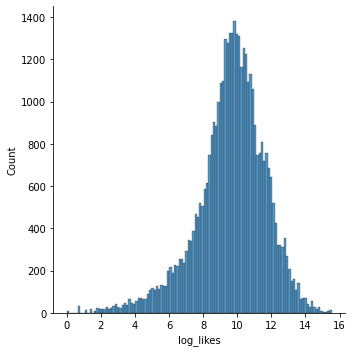

In [24]:
sns.displot(us_log['log_likes'] )

In [25]:
us_log.loc[us_log['dislikes'] == 0, 'dislikes'] = np.nan

In [26]:
us_log['log_dislikes'] = np.log(us_log['dislikes'])

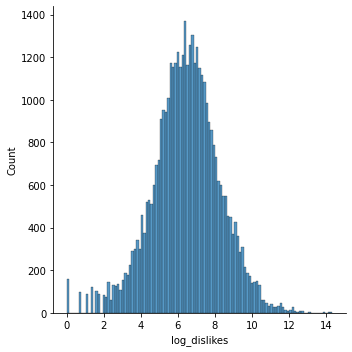

In [27]:
sns.displot(us_log['log_dislikes'] )

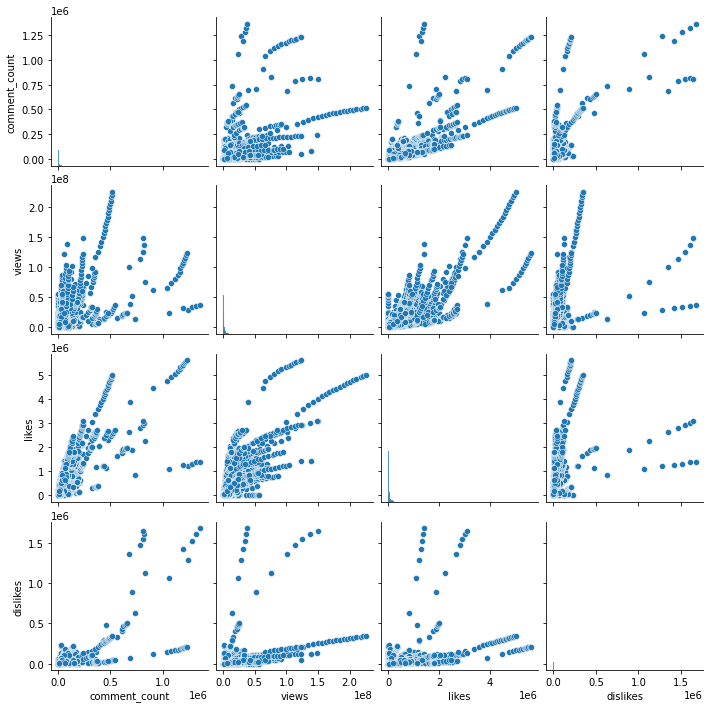

In [28]:
sns.pairplot(us, vars=['comment_count','views','likes','dislikes'])

In [29]:
ca = pd.read_csv('Youtube/CAvideos.csv')
ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


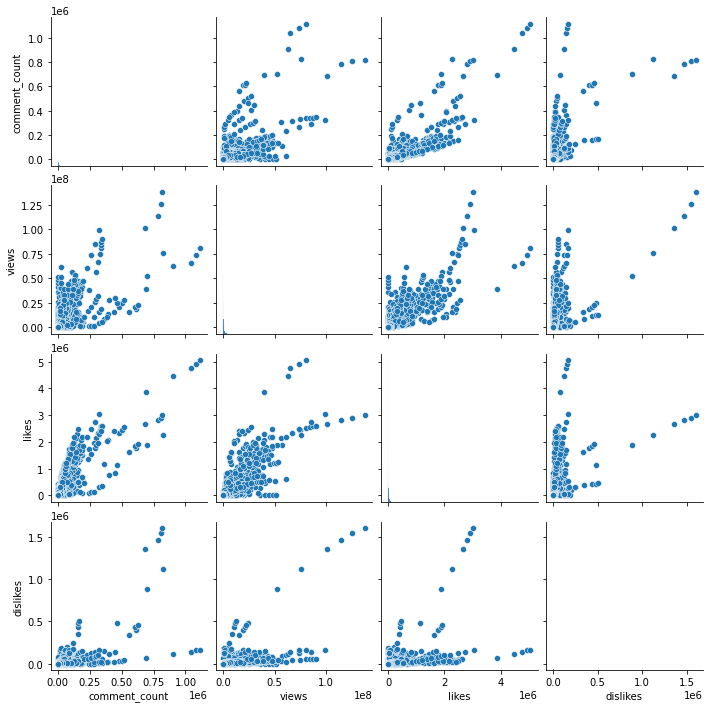

In [30]:
sns.pairplot(ca, vars=['comment_count','views','likes','dislikes'])

In [31]:
gb = pd.read_csv('Youtube/GBvideos.csv')
gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


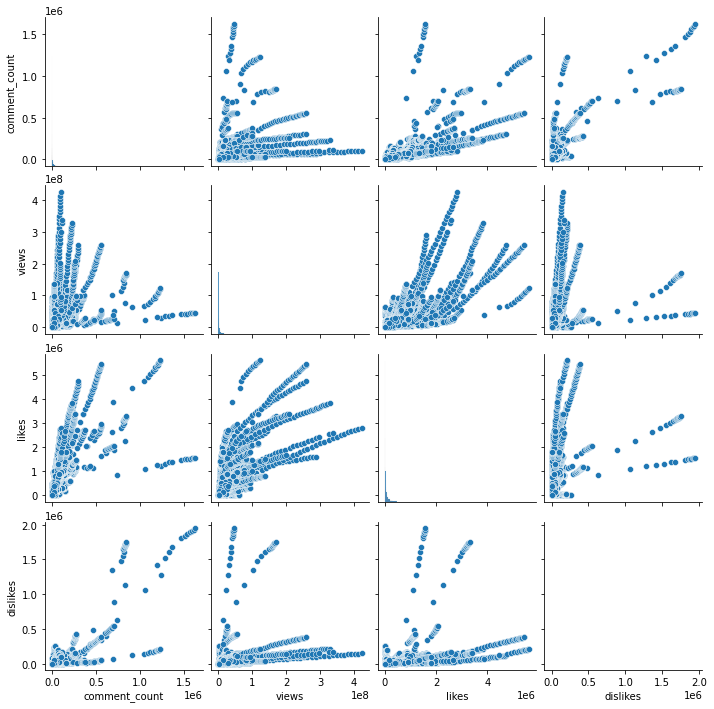

In [32]:
sns.pairplot(gb, vars=['comment_count','views','likes','dislikes'])

In [33]:
de = pd.read_csv('Youtube/DEvideos.csv')
de.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


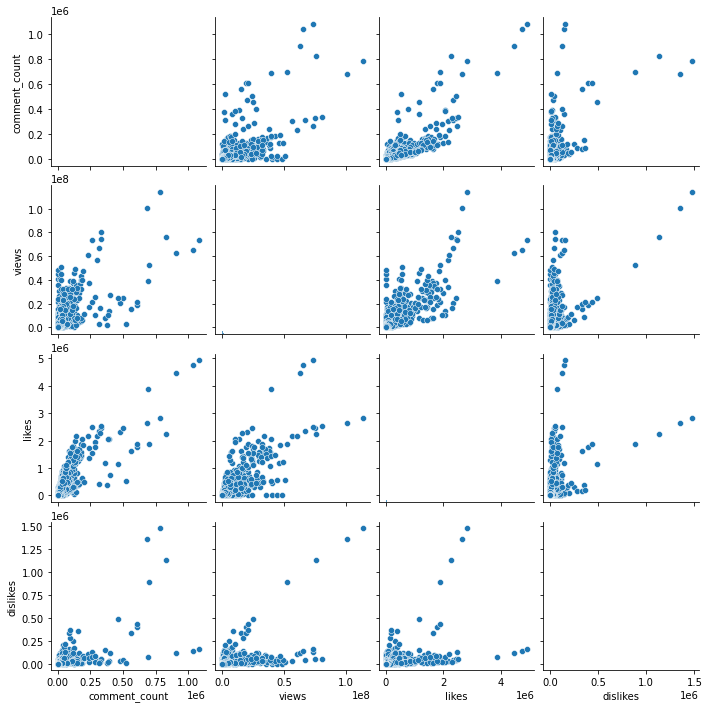

In [34]:
sns.pairplot(de, vars=['comment_count','views','likes','dislikes'])

In [35]:
fr = pd.read_csv('Youtube/FRvideos.csv')
fr.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


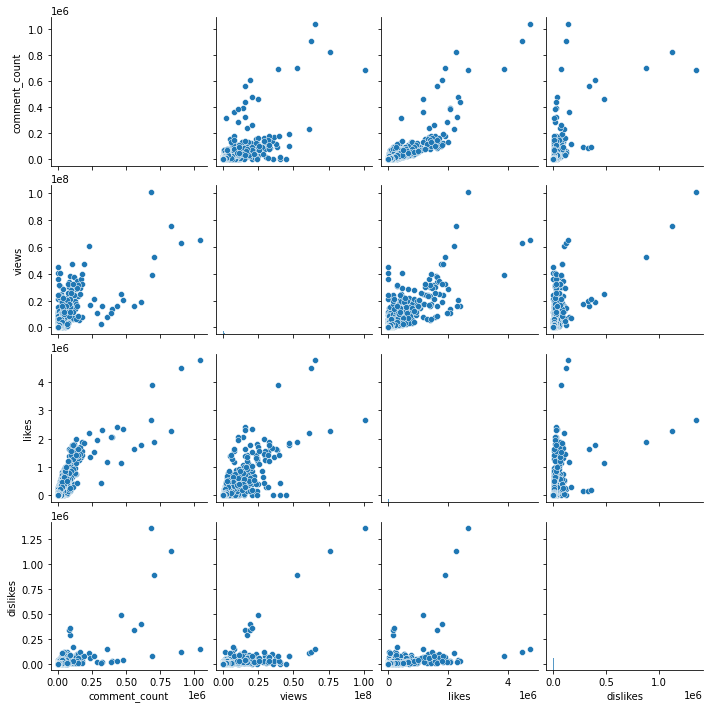

In [36]:
sns.pairplot(fr, vars=['comment_count','views','likes','dislikes'])

Q1:
* The histograms for comments, views, likes, and dislikes in the US are shown above. As the data seems to have some outliers, I specify some reasonable ranges which cover about 95% of the data. From the plots, I can say that all of these distributions look similar. They are right-skewed, and don't look like normal distributions. Furthermore, it's a bit hard to see the underlying information from the distribution.
* Then I apply a log transformation, and plot the histograms again. For comments, likes, and dislikes, I drop the 0 values as I believe these values are invalid. The distributions look like normal distributions now, except that the histogram of `log_likes` shows a left-skewed trend.
* A pairplot for the US is shown above. The `comment_count`, `views`, `likes`, `dislikes` all seem to have linear relationships with the other three variables.
* The pairplots for the other four regions are plotted. They look similar. The `comment_count`, `views`, `likes`, `dislikes` also seem to have linear relationships.

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

In [37]:
us_corr = us.corr()
us_corr

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


<AxesSubplot:>

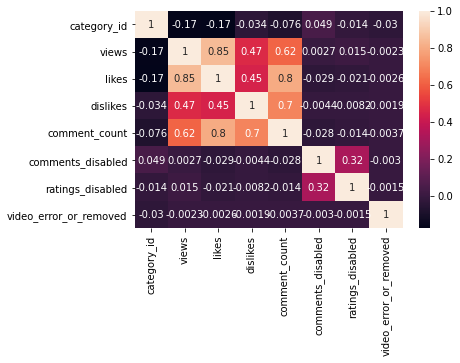

In [38]:
sns.heatmap(us_corr, annot=True)

Q2:

I choose the US to create the heatmap, which is shown above. From the plot, we can see there are some interesting correlations:

* The correlations between `views` and `likes`, `views` and `dislikes`, `views` and `comment_count`, `likes` and `dislikes`, `likes` and `comment_count`, `dislikes` and `comment_count`, `comments_disabled` and `ratings_disabled`, `category_id` and `views`, and `category_id` and `likes` are interesting. These variables listed above have strong positive correlations. In addition, the variables studied in question 1, where the pairplot of them also indicate that they might have linear relationships, are all included here, and they have quite large correlation coefficients.

* The correlations between `likes` and `comments_disabled`, and `likes` and `ratings_disabled` are also interesting. These variables have negative correlations.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. 
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variables are the same, and the independent variables are different. What does your interpretation say about the two models?

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
res = smf.ols('views ~ C(category_id)', us).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     166.2
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:06:35   Log-Likelihood:            -7.0455e+05
No. Observations:               40949   AIC:                         1.409e+06
Df Residuals:                   40933   BIC:                         1.409e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3.106e+06 

In [41]:
sm.stats.anova_lm(res, typ=2)

,sum_sq,df,F,PR(>F)
C(category_id),1.284957e+17,15.0,166.163941,0.0
Residual,2.110251e+18,40933.0,NaN,NaN


In [42]:
res = smf.ols('views ~ C(ratings_disabled)', us).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.656
Date:                Fri, 30 Apr 2021   Prob (F-statistic):            0.00189
Time:                        18:06:35   Log-Likelihood:            -7.0576e+05
No. Observations:               40949   AIC:                         1.412e+06
Df Residuals:                   40947   BIC:                         1.412e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [43]:
sm.stats.anova_lm(res, typ=2)

,sum_sq,df,F,PR(>F)
C(ratings_disabled),5.278348e+14,1.0,9.656451,0.001888
Residual,2.238219e+18,40947.0,NaN,NaN


In [44]:
res = smf.ols('views ~ C(comments_disabled)', us).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2934
Date:                Fri, 30 Apr 2021   Prob (F-statistic):              0.588
Time:                        18:06:35   Log-Likelihood:            -7.0576e+05
No. Observations:               40949   AIC:                         1.412e+06
Df Residuals:                   40947   BIC:                         1.412e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [45]:
sm.stats.anova_lm(res, typ=2)

,sum_sq,df,F,PR(>F)
C(comments_disabled),1.604192e+13,1.0,0.293411,0.588046
Residual,2.238731e+18,40947.0,NaN,NaN


Q3:
* I still choose the US, and I choose `views` as the dependent variable. Here I tried the two different ways to conduct ANOVA that were introduced in the lecture, and they had the same results.
* The null hypothesis is that there is no difference in views based on video categorys. Set the critical value $\alpha=0.05$. As the p-value is 0.0 < $\alpha$, we reject the null hypothesis. There is a statistically significant difference in views based on video categorys.
* I change the independent variables to be `ratings_disabled` and `comments_disabled`, and create two different regression models. 
    * For the model 'views ~ ratings_disabled', the null hypothesis is that there is no difference in views based on whether the ratings are disabled. Set the critical value $\alpha=0.05$. As the p-value is 0.00189 < $\alpha$, there is a statistically significant difference in views depending on whether the ratings are disabled.
    * For the model 'views ~ comments_disabled', the null hypothesis is that there is no difference in views based on whether the comments are disabled. Set the critical value $\alpha=0.05$. As the p-value is 0.588 > $\alpha$, there is no statistically significant difference in views depending on whether the comments are disabled.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

In [46]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [47]:
pok_corr = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
pok_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


<AxesSubplot:>

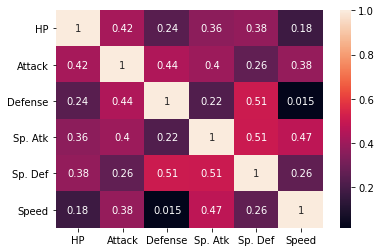

In [48]:
sns.heatmap(pok_corr, annot=True)

Q4:

I create a heatmap. From this plot, we can see that the pairs {Defense, Sp. Def} and {Sp. Def., Sp. Atk} have the most correlation coefficient, and the pair {Defense, Speed} has the least correlation coefficient.

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

In [49]:
abilities = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
types = pokemon['Type 1'].unique()
types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

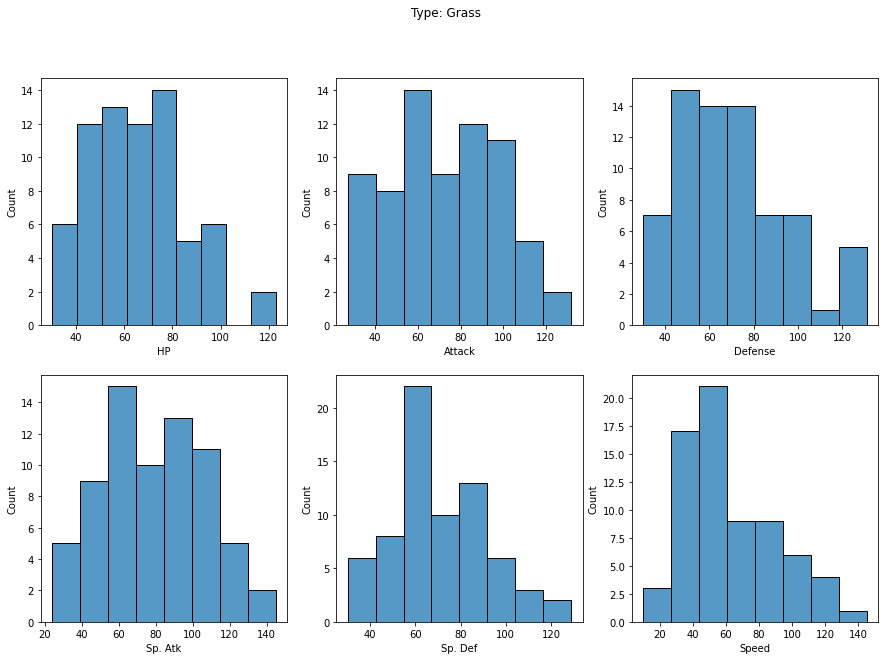

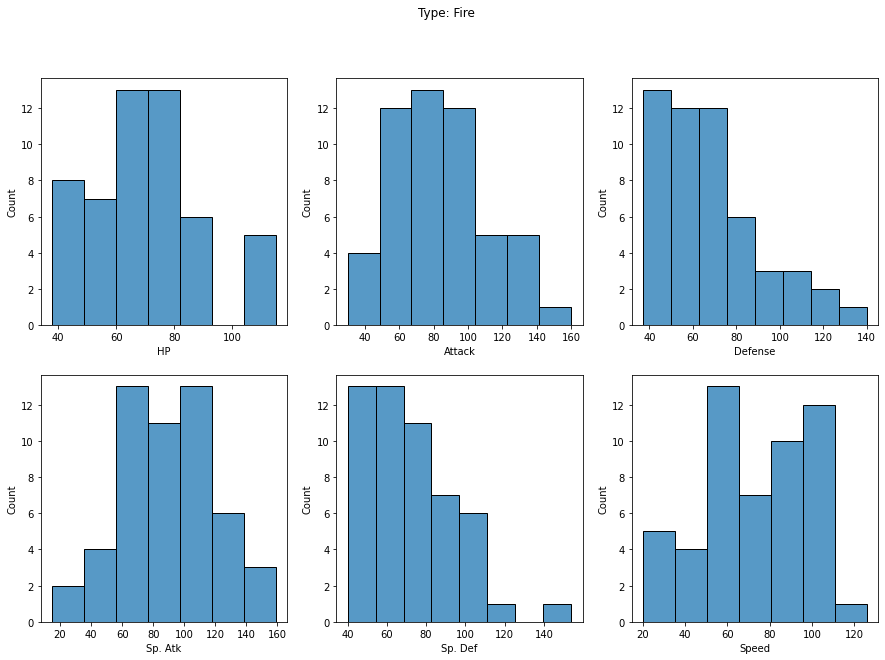

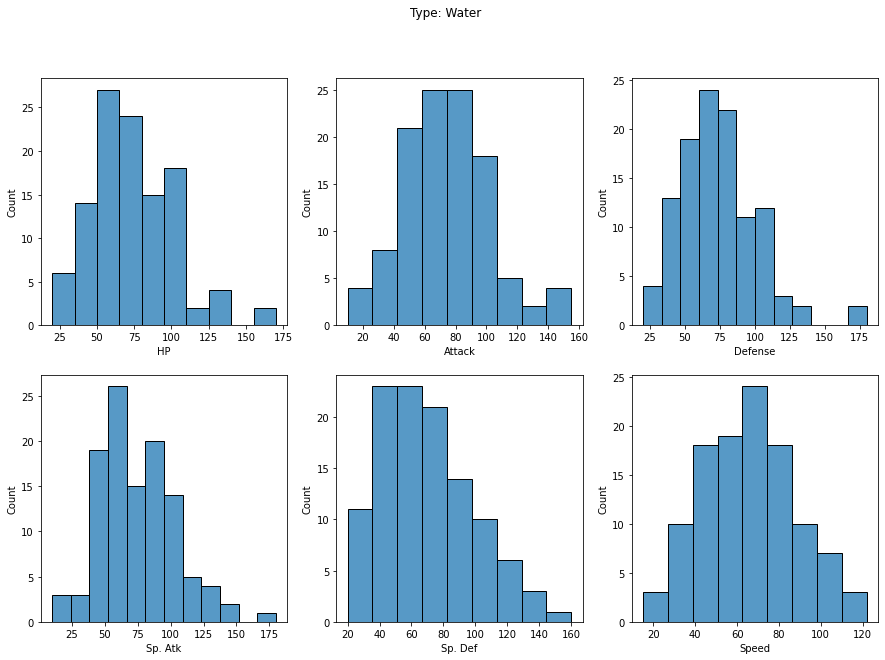

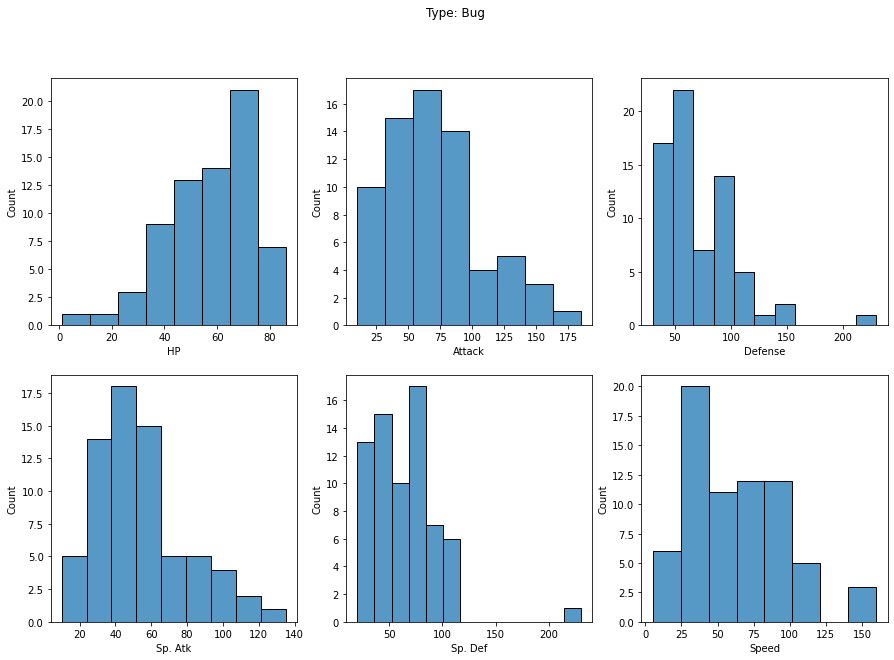

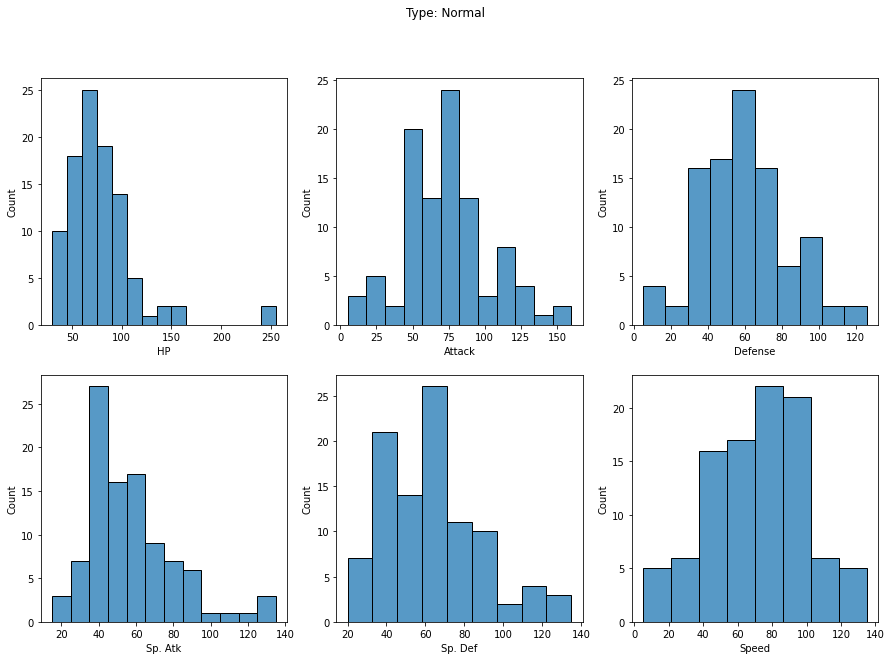

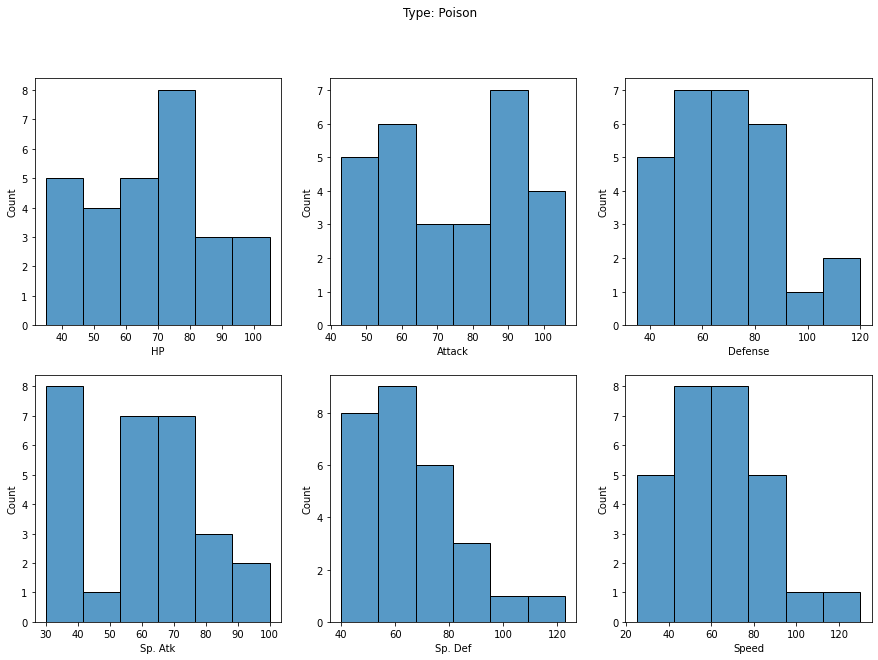

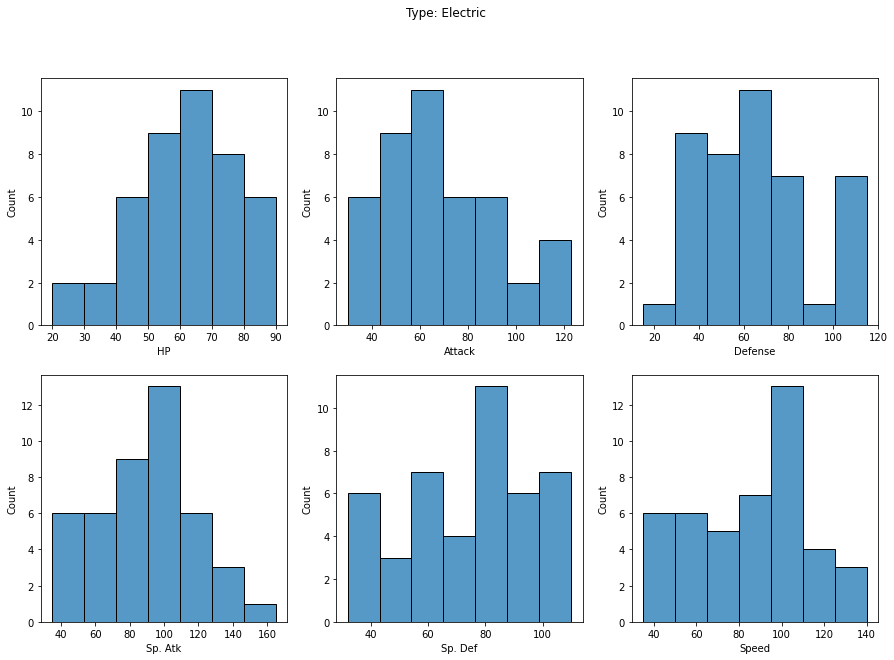

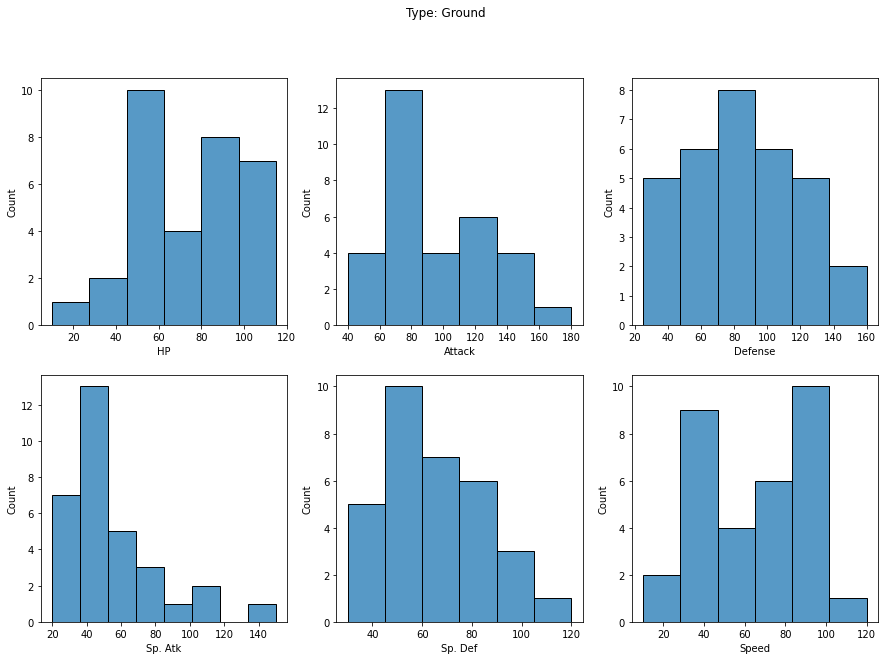

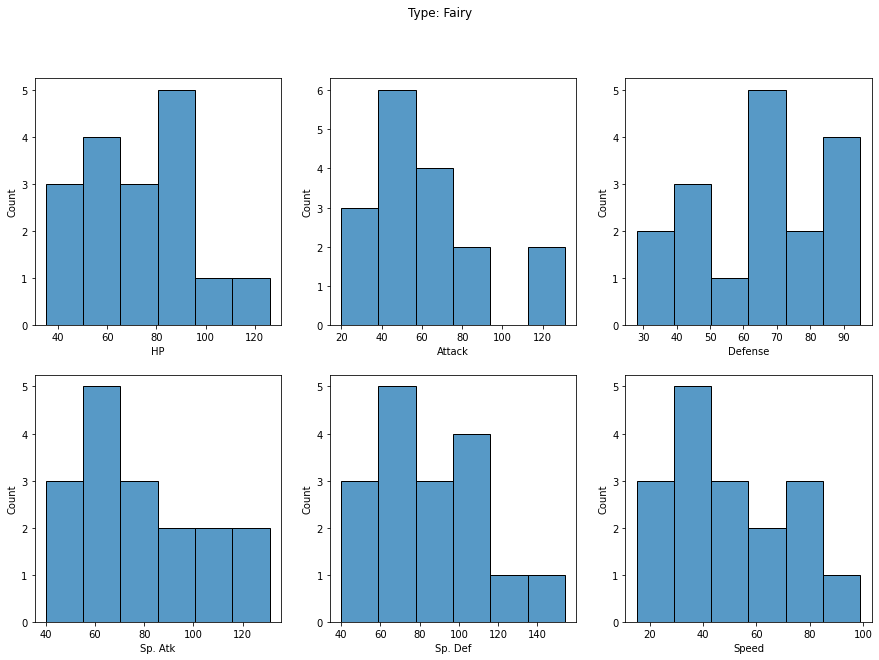

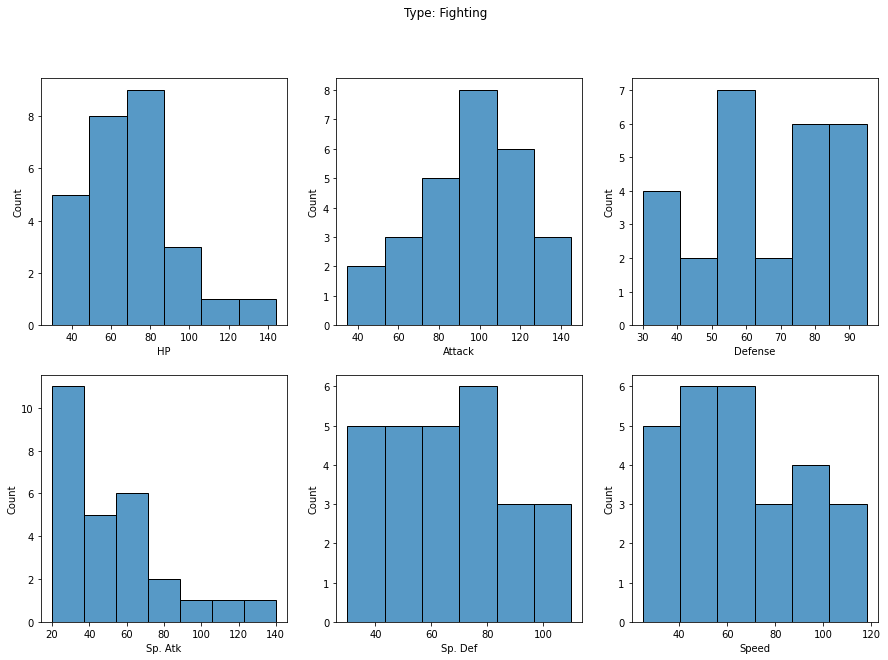

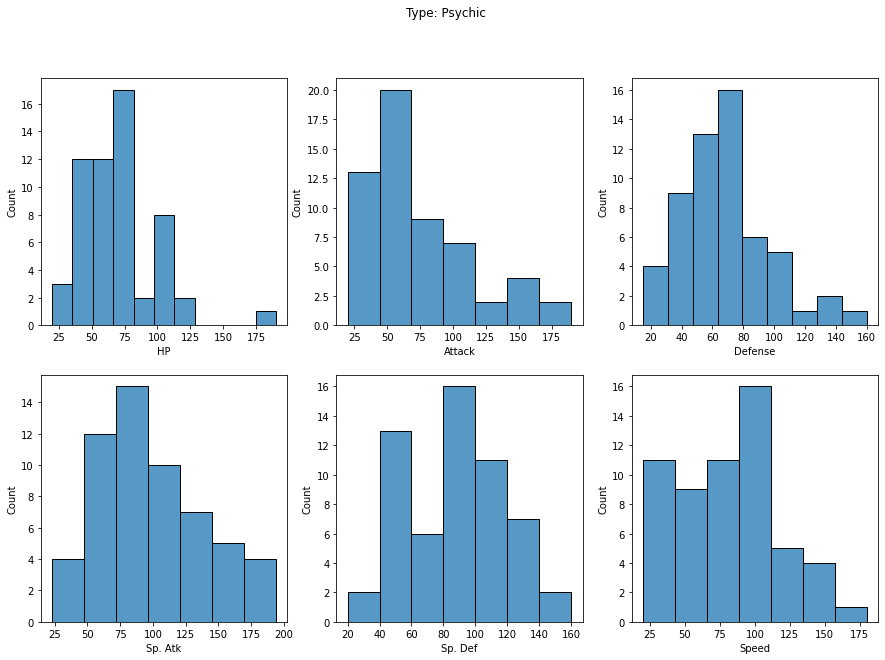

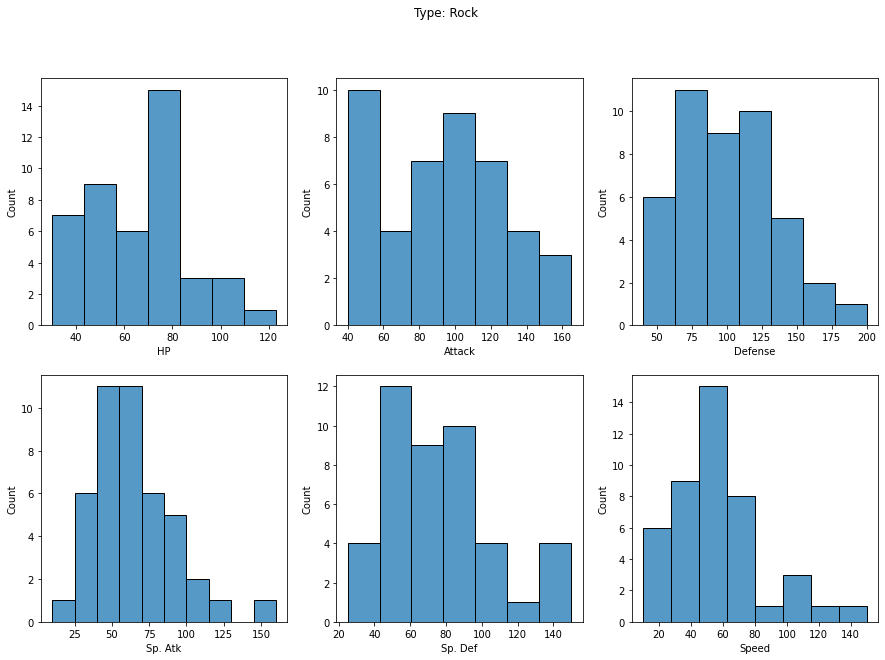

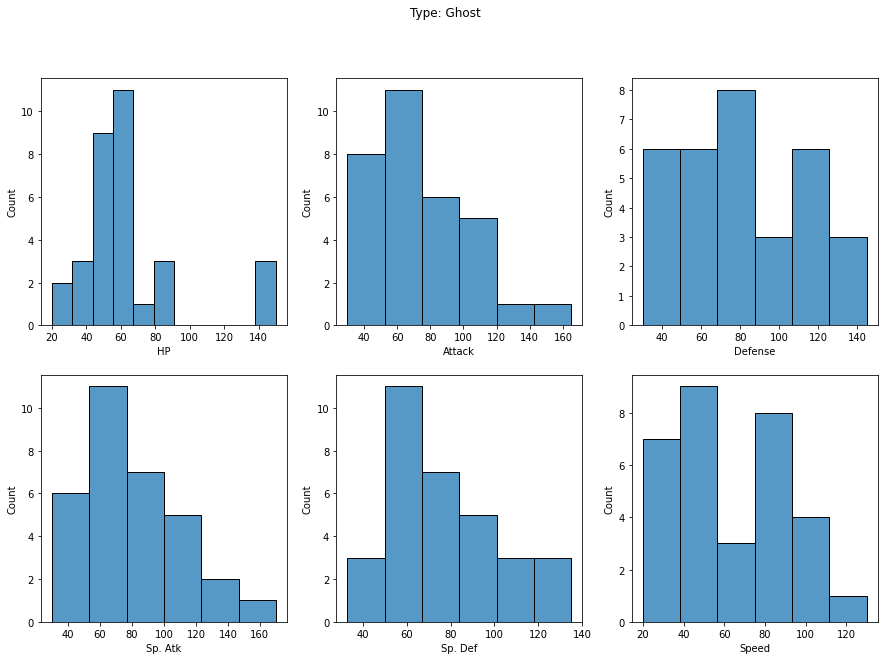

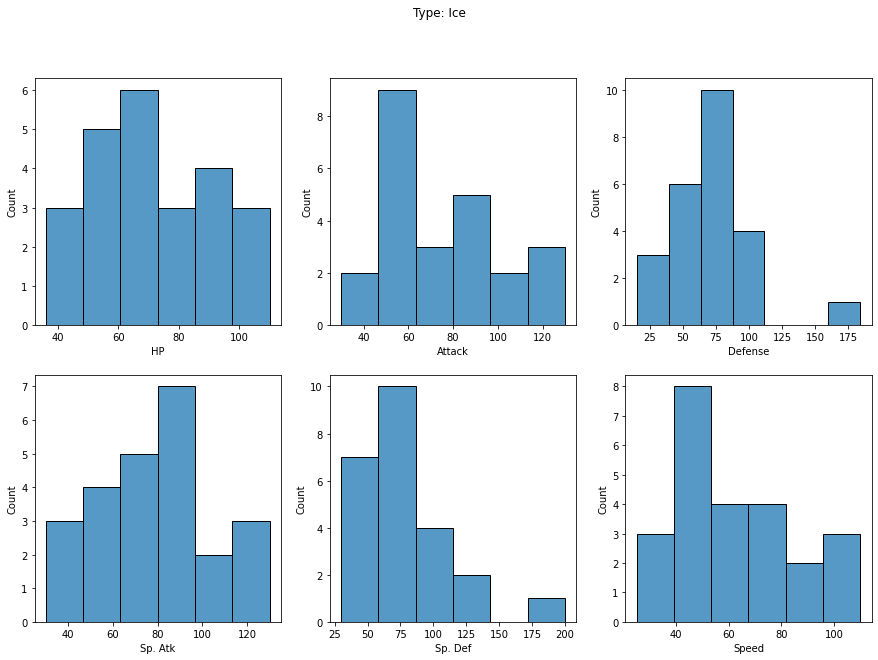

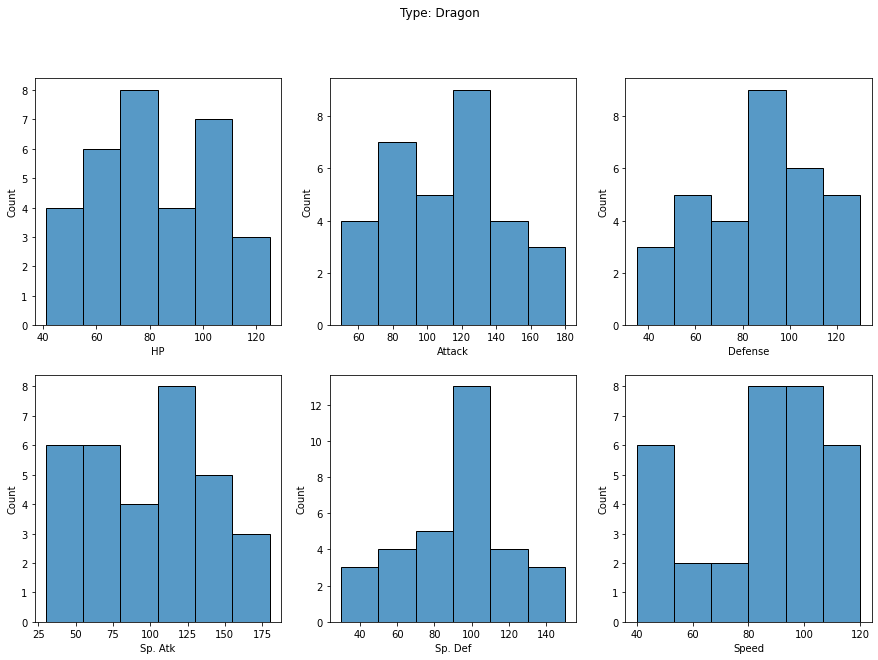

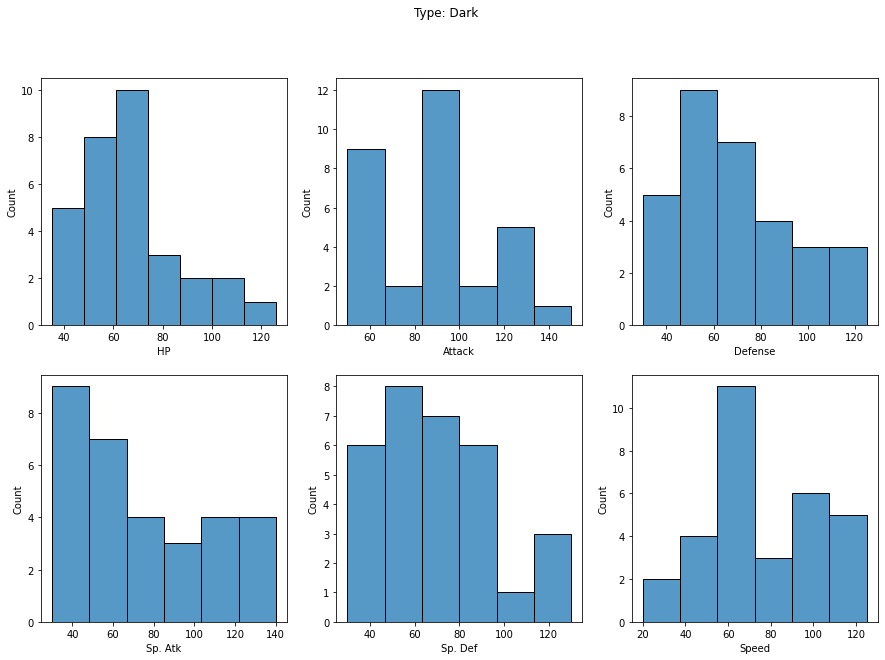

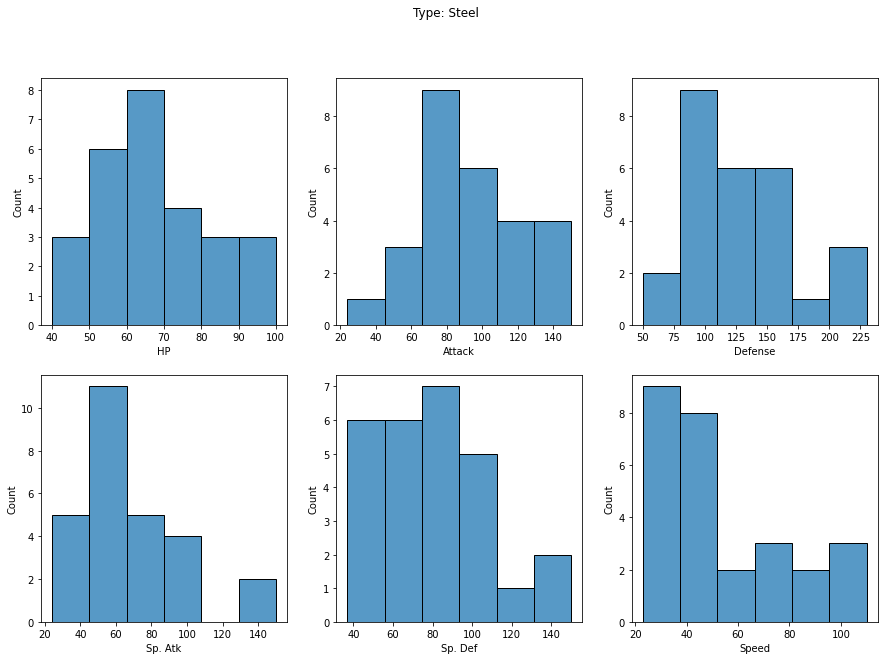

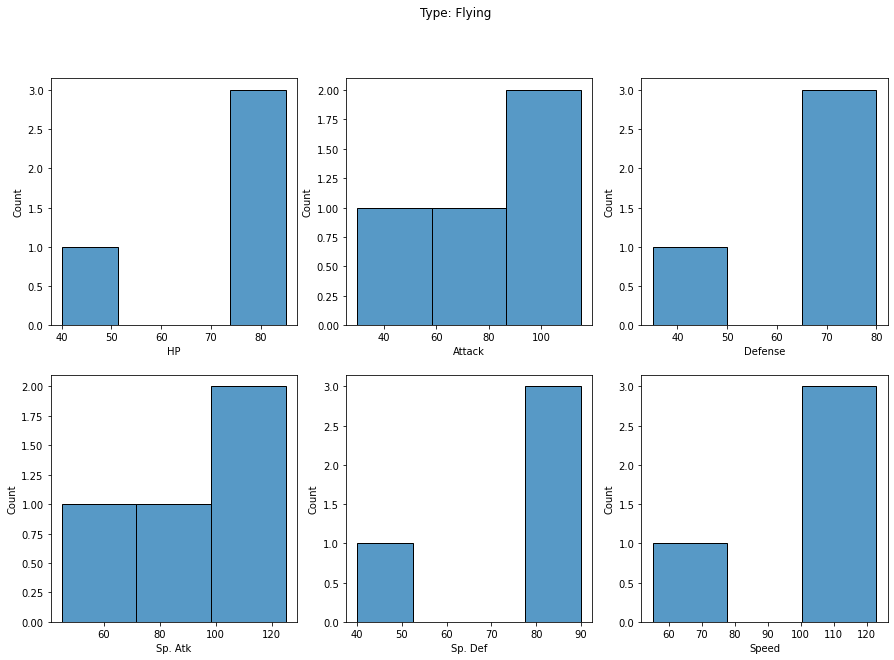

In [50]:
for each in types:
    current = pokemon[pokemon['Type 1'] == each]
    f, axs = plt.subplots(2, 3, figsize=(15, 10))
    f.suptitle('Type: ' + str(each))
    for i in range(6):
        sns.histplot(current[abilities[i]], ax=axs[i//3, i%3])

Q5:

According to the data description on Kaggle:
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2

As this question asks to plot the distribution per Pokémon type, I think it would be more reasonable to plot the distributions based on Type 1, since this is the type that each pokemon has. The distributions are plotted above.

From these histograms, we can see that:
* For the Grass type, the HP, Attack, and Defense distribution seem to be concentrated on the left half. On the left half of the distributions, they seem to have uniformly high frequencies, but there are only sparse points on the right half of the distributions. Compared to them, the Sp. Atk distribution seems to be more similar to a normal distribution. The distributions of Sp. Def and Speed seem to be right skewed.
* For the Fire type, the Attack, Defense, and Sp. Def distribution seem to be concentrated on the left half, and a bit right skewed, especially for the Defense and Sp. Def distributions. The HP and Speed have some strange distributions that have the highest frequencies around the center, but do not look like normal distributions. The Sp. Atk distribution looks better, which is also concentrated around the center, but it also does not look like a normal distribution. 
* For the Water type, the distributions of HP, Defense, Sp. Atk, and Sp. Def seem to be right skewed, and the Speed distribution seems to be similar to a normal distribution. The Attack distribution is concentrated around the center, but it does not look like a normal distribution. 
* For the Bug type, the distribution of HP seems to be left skewed, while all the other distributions seem to be right skewed. The Sp. Def distribution only has an outlier on the right half of the distribution.
* For the Normal type, the distributions of HP, Sp. Atk, and Sp. Def seem to be right skewed. The Speed distribution has some left-skewed trend. The distributions of Attack and Defense are concentrated around the center, but do not look like normal distributions. 
* For the Poison type, the Defense, Sp. Def, and Speed distribution seem to be concentrated on the left half. The HP, Attack, and Sp. Atk look like uniform distributions to some extent, but there exist some outliers or gaps.
* For the Electric type, the distributions of HP, Sp. Def, and Speed seem to be left skewed, and the Attack and Sp. Atk distributions seem to be right skewed. The Denfense distribution looks like a uniform distribution to some extent, but there exist some gaps.
* For the Ground type, the HP and Speed distributions seem to be left skewed, and the Attack, Sp. Atk, and Sp. Def distributions seem to be right skewed. The Defense distribution looks better, and is concentrated around the center, but it also does not look like a normal distribution. 
* For the Fairy type, the Defense distribution seems to be concentrated on the right half, while all the other distributions seem to be concentrated on the left half.
* For the Fighting type,the Sp. Def and Speed distributions look like uniform distributions to some extent, but they have higher frequencies on the left half. The HP and Sp. Atk distributions seem to be right skewed, while the Attack distribution seems to be left skewed.
* For the Psychic type, the HP, Attack, Defense, Sp. Atk, and Speed distributions all seem to be right skewed. Compared to them, the Sp. Def distribution seems to be more similar to a normal distribution. 
* For the Rock type, the HP, Defense, Sp. Atk, Sp. Def, and Speed distributions all seem to be right skewed. Compared to them, the Attack distribution seems to be more similar to a normal distribution, but there is an extremely high frequency in the group of 40-60, which makes the distribution become less likely to be a noraml distrbution.
* For the Ghost type, the HP, Attack, Sp. Atk, Sp. Def, and Speed distributions all seem to be right skewed. The Defense distribution looks like a uniform distribution to some extent, but there exist some gaps.
* For the Ice type, the HP distribution looks like a uniform distribution to some extent, but it has higher frequencies on the left half. The Attack, Defense, Sp. Def, and Speed distributions seem to be right skewed, while the Sp. Atk distribution seems to be left skewed.
* For the Dragon type, the Sp. Atk distribution looks like a uniform distribution to some extent, but there exist some gaps. The Defense and Speed distributions seem to be left skewed. The Sp. Def distribution is concentrated around the center, but it also does not look like a normal distribution. Compared them, the HP and Attack distributions seem to be similar to normal distributions.
* For the Dark type, the HP, Attack, Defense, Sp. Atk, and Sp. Def all seem to be right skewed. The Speed distribution looks better, and is concentrated around the center, but it also does not look like a normal distribution. 
* For the Steel type, the Attack distribution seems to be concentrated around the center, but it does not look like a normal distribution. All the other distributions seem to be right skewed.
* For the Flying type, the data points seem to be not enough, and the distribuion shapes seem to be strange, so it is hard to describe the distributions here.

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

In [51]:
generation = pokemon['Generation'].unique()
generation

array([1, 2, 3, 4, 5, 6], dtype=int64)

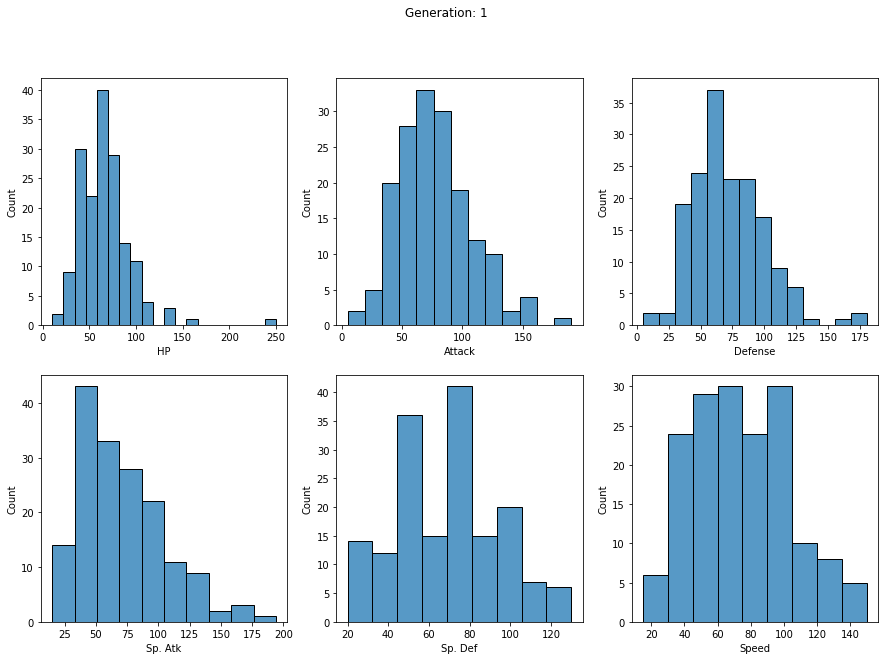

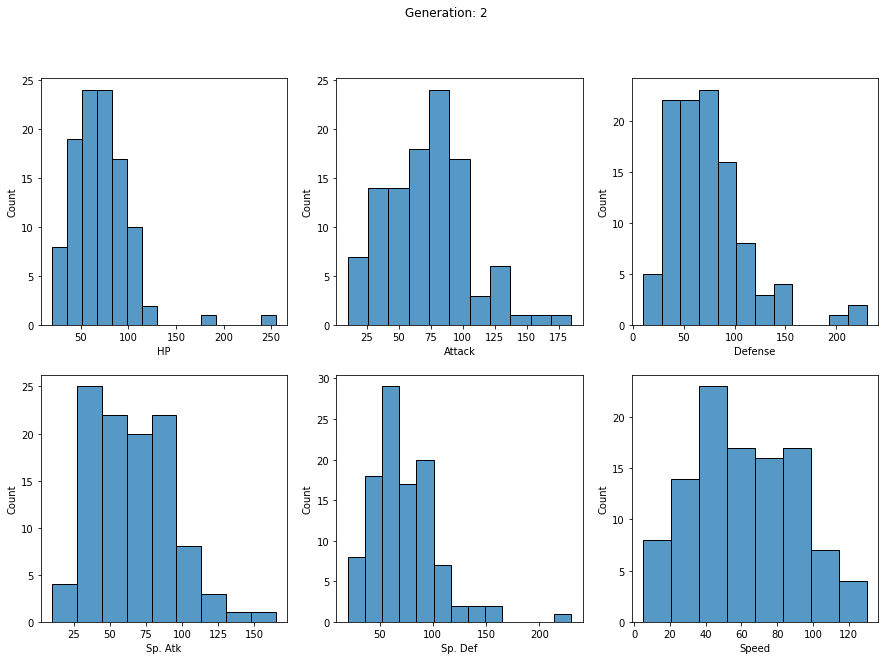

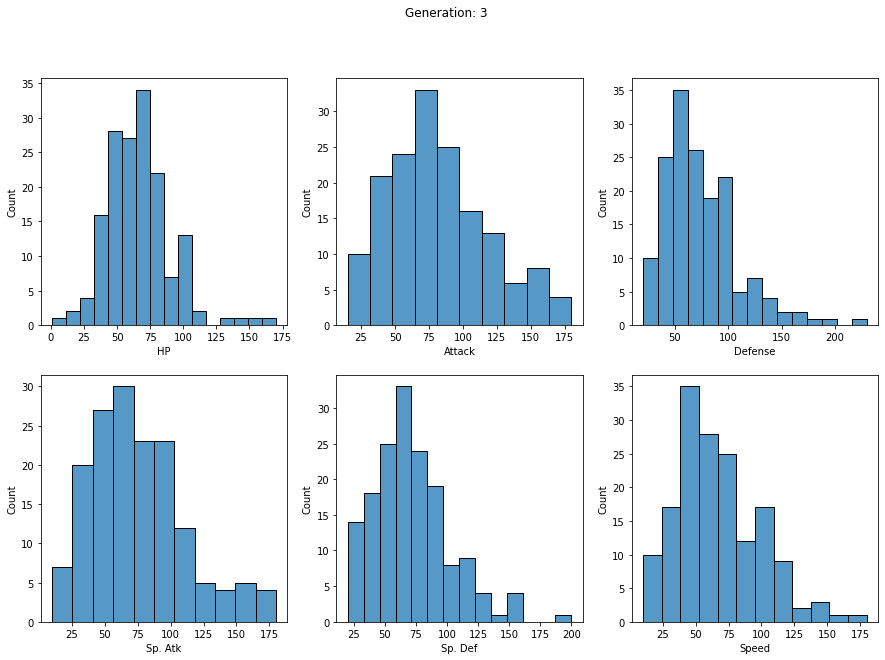

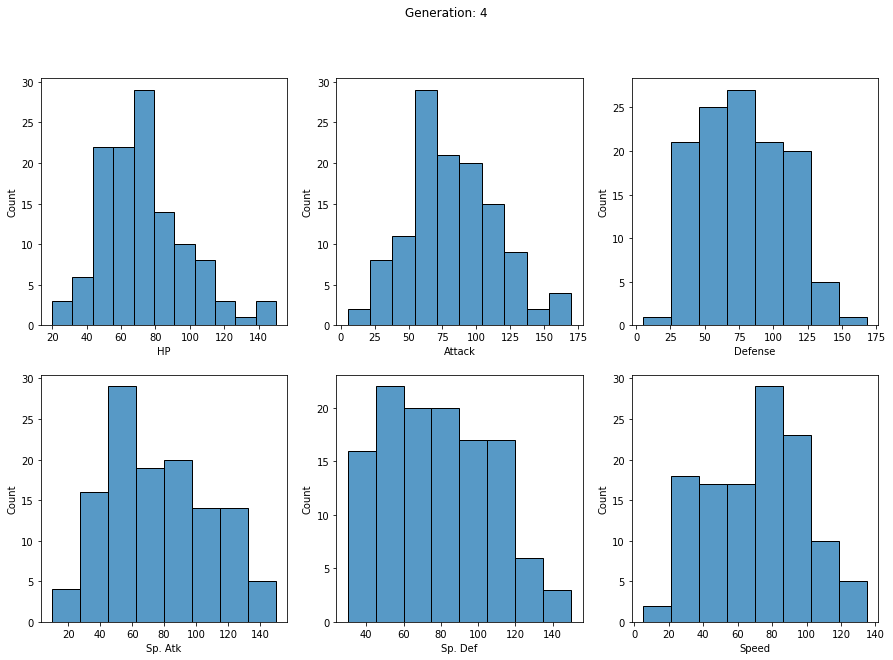

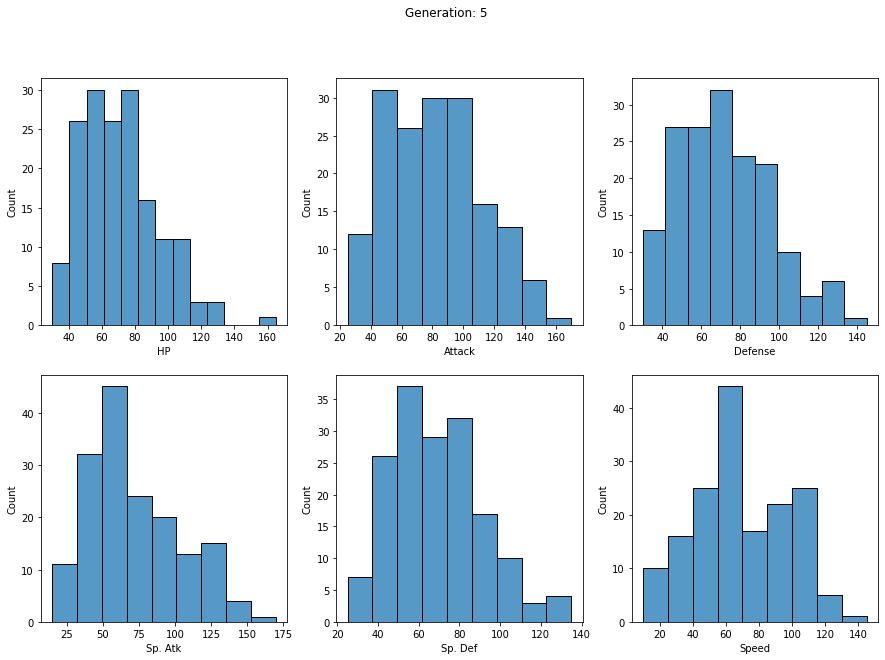

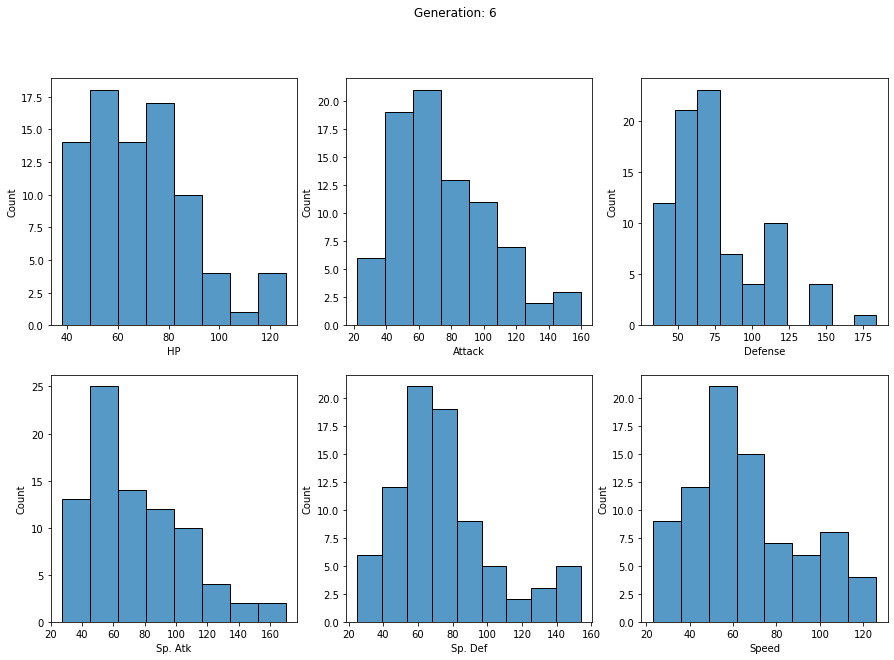

In [52]:
for each in generation:
    current = pokemon[pokemon['Generation'] == each]
    f, axs = plt.subplots(2, 3, figsize=(15, 10))
    f.suptitle('Generation: ' + str(each))
    for i in range(6):
        sns.histplot(current[abilities[i]], ax=axs[i//3, i%3])

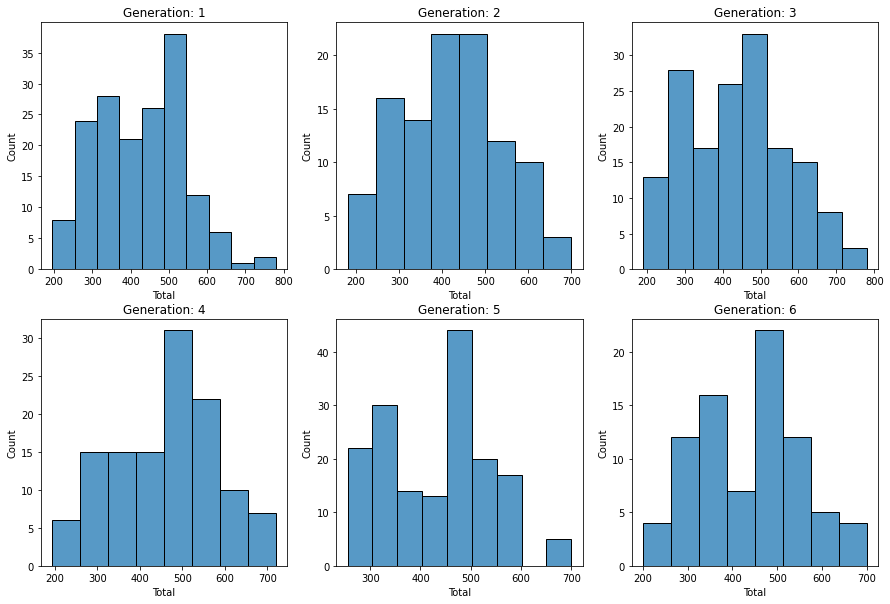

In [53]:
f, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(6):
    axs[i//3, i%3].title.set_text('Generation: ' + str(i+1))
    current = pokemon[pokemon['Generation'] == generation[i]]['Total']
    sns.histplot(current, ax=axs[i//3, i%3])

<AxesSubplot:xlabel='Generation', ylabel='Total'>

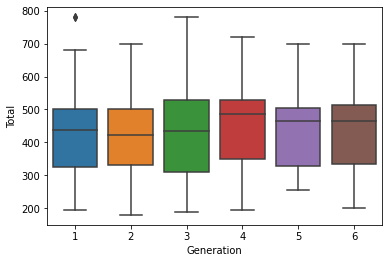

In [54]:
sns.boxplot(x="Generation", y='Total', data=pokemon)

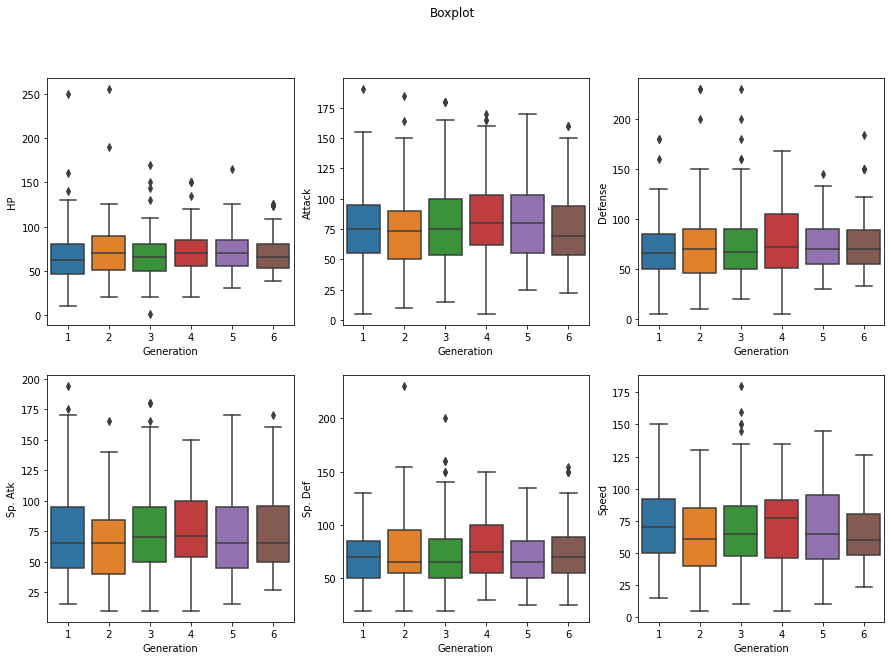

In [55]:
f, axs = plt.subplots(2, 3, figsize=(15, 10))
f.suptitle('Boxplot')
for i in range(6):
    sns.boxplot(x="Generation", y=abilities[i], data=pokemon, ax=axs[i//3, i%3])

In [56]:
res = smf.ols('Total ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.873
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.172
Time:                        21:16:46   Log-Likelihood:                -4963.5
No. Observations:                 800   AIC:                             9931.
Df Residuals:                     798   BIC:                             9940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    423.4898      9.486     44.643      0.0

In [57]:
res = smf.ols('HP ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.758
Date:                Wed, 03 Mar 2021   Prob (F-statistic):             0.0972
Time:                        21:16:46   Log-Likelihood:                -3725.3
No. Observations:                 800   AIC:                             7455.
Df Residuals:                     798   BIC:                             7464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.2608      2.018     32.834      0.0

In [58]:
res = smf.ols('Attack ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.118
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.146
Time:                        21:16:46   Log-Likelihood:                -3917.5
No. Observations:                 800   AIC:                             7839.
Df Residuals:                     798   BIC:                             7848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.6601      2.566     29.483      0.0

In [59]:
res = smf.ols('Defense ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Defense   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.438
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.231
Time:                        21:16:47   Log-Likelihood:                -3885.8
No. Observations:                 800   AIC:                             7776.
Df Residuals:                     798   BIC:                             7785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.1961      2.467     28.865      0.0

In [60]:
res = smf.ols('Q("Sp. Atk") ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Q("Sp. Atk")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.061
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.303
Time:                        21:16:47   Log-Likelihood:                -3924.6
No. Observations:                 800   AIC:                             7853.
Df Residuals:                     798   BIC:                             7862.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4346      2.589     27.207      0.0

In [61]:
res = smf.ols('Q("Sp. Def") ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Q("Sp. Def")   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6481
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.421
Time:                        21:16:47   Log-Likelihood:                -3795.2
No. Observations:                 800   AIC:                             7594.
Df Residuals:                     798   BIC:                             7604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.3165      2.202     31.929      0.0

In [62]:
res = smf.ols('Speed ~ Generation', pokemon).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4268
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.514
Time:                        21:16:47   Log-Likelihood:                -3829.9
No. Observations:                 800   AIC:                             7664.
Df Residuals:                     798   BIC:                             7673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.6218      2.300     30.270      0.0

Q6:

I plot the histograms and boxplots of different ability points and the total points on different generations. Then I conduct ANOVA. The null hypothesis is that there is no difference on the ability points based on the generation.

It seems that the Pokémon in each generation does not differ from each other too much in the ability points, although some slight differences might occur. Both the histograms and the boxplots lead to the above conclusion. In addition, the ANOVA also tells the same result when I set the critical value $\alpha $ = 0.05. Since all of the p-values are larger than $\alpha$, we could not reject the null hypothesis. Therefore, there is no statistically significant difference in ability points depending on the generation, and I think designers of Pokémon did not try to address different distributions of ability points in each generation.